In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
Cm = 1.0  # membrane capacitance, in uF/cm^2
gNa = 120.0  # maximum conductances, in mS/cm^2
gK = 36.0
gL = 0.3
ENa = 50.0  # reversal potentials, in mV
EK = -77.0
EL = -54.387

# Time variables
t = 0.0
dt = 0.01  # time step
T = 50.0  # total time to simulate

# Hodgkin-Huxley Equations
def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65.0) / 18.0)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65.0) / 20.0)

def beta_h(V):
    return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

def alpha_n(V):
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65) / 80.0)

# Initializations
V = -65.0  # initial membrane potential
m = alpha_m(V) / (alpha_m(V) + beta_m(V))
h = alpha_h(V) / (alpha_h(V) + beta_h(V))
n = alpha_n(V) / (alpha_n(V) + beta_n(V))

# Storage for plotting
time = np.arange(0, T, dt)
voltages = []

# Simulation loop
for t in time:
    gNa_t = gNa * (m**3) * h
    gK_t = gK * (n**4)
    gL_t = gL

    INa = gNa_t * (V - ENa)
    IK = gK_t * (V - EK)
    IL = gL_t * (V - EL)

    dVdt = -(INa + IK + IL) / Cm
    dm_dt = alpha_m(V) * (1.0 - m) - beta_m(V) * m
    dh_dt = alpha_h(V) * (1.0 - h) - beta_h(V) * h
    dn_dt = alpha_n(V) * (1.0 - n) - beta_n(V) * n

    V += dVdt * dt
    m += dm_dt * dt
    h += dh_dt * dt
    n += dn_dt * dt

    voltages.append(V)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, voltages, label='Membrane Potential')
plt.title('Neuron voltage over time')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Neuron:
    def __init__(self):
        # Constants
        self.Cm = 1.0  # membrane capacitance, in uF/cm^2
        self.gNa = 120.0  # maximum conductances, in mS/cm^2
        self.gK = 36.0
        self.gL = 0.3
        self.ENa = 50.0  # reversal potentials, in mV
        self.EK = -77.0
        self.EL = -54.387

        # Initial membrane potential and gating variables
        self.V = -65.0
        self.m = self.alpha_m(self.V) / (self.alpha_m(self.V) + self.beta_m(self.V))
        self.h = self.alpha_h(self.V) / (self.alpha_h(self.V) + self.beta_h(self.V))
        self.n = self.alpha_n(self.V) / (self.alpha_n(self.V) + self.beta_n(self.V))

    def alpha_m(self, V):
        return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

    def beta_m(self, V):
        return 4.0 * np.exp(-(V + 65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65.0) / 20.0)

    def beta_h(self, V):
        return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80.0)
    
    def apply_synaptic_input(self, synaptic_input):
        # Apply synaptic input directly to the membrane potential
        self.V += synaptic_input

    def update(self, dt):
        # Update gating variables and membrane potential
        gNa_t = self.gNa * (self.m**3) * self.h
        gK_t = self.gK * (self.n**4)
        gL_t = self.gL

        INa = gNa_t * (self.V - self.ENa)
        IK = gK_t * (self.V - self.EK)
        IL = gL_t * (self.V - self.EL)

        dVdt = -(INa + IK + IL) / self.Cm
        dm_dt = self.alpha_m(self.V) * (1.0 - self.m) - self.beta_m(self.V) * self.m
        dh_dt = self.alpha_h(self.V) * (1.0 - self.h) - self.beta_h(self.V) * self.h
        dn_dt = self.alpha_n(self.V) * (1.0 - self.n) - self.beta_n(self.V) * self.n

        self.V += dVdt * dt
        self.m += dm_dt * dt
        self.h += dh_dt * dt
        self.n += dn_dt * dt

        return self.V

    def simulate(self, T, dt, synaptic_inputs=None):
        # Simulate neuron over time T with time step dt
        time = np.arange(0, T, dt)
        voltages = []

        if synaptic_inputs is None:
            synaptic_inputs = np.zeros_like(time)

        for t, synaptic_input in zip(time, synaptic_inputs):
            self.apply_synaptic_input(synaptic_input)
            V = self.update(dt)
            voltages.append(V)

        return time, voltages

# Function to create a row of neurons and simulate them
def simulate_row_of_neurons(num_neurons, T, dt, stimulus_magnitude):
    neurons = [Neuron() for _ in range(num_neurons)]
    potentials = np.zeros((num_neurons, int(T/dt)))

    for i, neuron in enumerate(neurons):
        # Apply a stimulus at the beginning
        synaptic_inputs = np.zeros(int(T/dt))
        synaptic_inputs[0] = stimulus_magnitude  # Apply stimulus at t=0

        time, voltages = neuron.simulate(T, dt, synaptic_inputs)
        potentials[i, :] = voltages

    return time, potentials

# Simulation parameters
num_neurons = 10  # Number of neurons in a row
T = 50.0          # Total simulation time
dt = 0.01         # Time step
stimulus_magnitude = 50.0  # Stimulus magnitude

# Simulate
time, all_potentials = simulate_row_of_neurons(num_neurons, T, dt, stimulus_magnitude)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(all_potentials, cmap='viridis', xticklabels=int(T/dt/10), yticklabels=1)
plt.title('Heatmap of Neuron Potentials Over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Neuron:
    def __init__(self):
        # Constants
        self.Cm = 1.0  # membrane capacitance, in uF/cm^2
        self.gNa = 120.0  # maximum conductances, in mS/cm^2
        self.gK = 36.0
        self.gL = 0.3
        self.ENa = 50.0  # reversal potentials, in mV
        self.EK = -77.0
        self.EL = -54.387

        # Initial membrane potential and gating variables
        self.V = -65.0
        self.m = self.alpha_m(self.V) / (self.alpha_m(self.V) + self.beta_m(self.V))
        self.h = self.alpha_h(self.V) / (self.alpha_h(self.V) + self.beta_h(self.V))
        self.n = self.alpha_n(self.V) / (self.alpha_n(self.V) + self.beta_n(self.V))

    def alpha_m(self, V):
        return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

    def beta_m(self, V):
        return 4.0 * np.exp(-(V + 65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65.0) / 20.0)

    def beta_h(self, V):
        return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80.0)
    
    def apply_synaptic_input(self, synaptic_input):
        # Apply synaptic input directly to the membrane potential
        self.V += synaptic_input

    def update(self, dt):
        # Update gating variables and membrane potential
        gNa_t = self.gNa * (self.m**3) * self.h
        gK_t = self.gK * (self.n**4)
        gL_t = self.gL

        INa = gNa_t * (self.V - self.ENa)
        IK = gK_t * (self.V - self.EK)
        IL = gL_t * (self.V - self.EL)

        dVdt = -(INa + IK + IL) / self.Cm
        dm_dt = self.alpha_m(self.V) * (1.0 - self.m) - self.beta_m(self.V) * self.m
        dh_dt = self.alpha_h(self.V) * (1.0 - self.h) - self.beta_h(self.V) * self.h
        dn_dt = self.alpha_n(self.V) * (1.0 - self.n) - self.beta_n(self.V) * self.n

        self.V += dVdt * dt
        self.m += dm_dt * dt
        self.h += dh_dt * dt
        self.n += dn_dt * dt

        return self.V
    
    def send_output(self):
        # Determines if this neuron should send output to its neighbors
        if self.V > 30:  # Threshold voltage for action potential
            return True
        return False

    def simulate(self, T, dt, synaptic_inputs=None):
        # Simulate neuron over time T with time step dt
        time = np.arange(0, T, dt)
        voltages = []

        if synaptic_inputs is None:
            synaptic_inputs = np.zeros_like(time)

        for t, synaptic_input in zip(time, synaptic_inputs):
            self.apply_synaptic_input(synaptic_input)
            V = self.update(dt)
            voltages.append(V)

        return time, voltages

def simulate_neuron_grid(size, T, dt, stimulus_position):
    grid = [[Neuron() for _ in range(size)] for _ in range(size)]
    potentials = np.zeros((size, size, int(T/dt)))

    for t in range(int(T/dt)):
        for i in range(size):
            for j in range(size):
                if (i, j) == stimulus_position and t == 0:
                    grid[i][j].apply_synaptic_input(50.0)  # Apply initial stimulus

                # Check for output from neighbors and apply inputs
                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        if 0 <= i + di < size and 0 <= j + dj < size:
                            if grid[i + di][j + dj].send_output():
                                grid[i][j].apply_synaptic_input(1)  # Apply input from neighbor

                # Update neuron
                V = grid[i][j].update(dt)
                potentials[i, j, t] = V

    return potentials

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import io
import numpy as np

def create_gif(potentials, filename, size, dt):
    images = []
    x, y = np.meshgrid(np.arange(size), np.arange(size))
    x, y = x.flatten(), y.flatten()
    dz = np.zeros_like(x)  # Initial bar heights

    for t in range(potentials.shape[2]):
        buffer = io.BytesIO()
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Update bar heights
        dz = potentials[:, :, t].flatten()

        # Create 3D bar plot
        ax.bar3d(x, y, np.zeros_like(dz), 1, 1, dz, shade=True)
        ax.set_zlim(-100, 100)  # Fix the scale for z-axis

        # Rotate the view
        angle = 45 + 360 * (t / potentials.shape[2])  # Rotate over time
        ax.view_init(30, angle)

        # Save to buffer
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        images.append(imageio.imread(buffer))
        plt.close()
        buffer.close()

    # Create GIF
    imageio.mimsave(filename, images, duration=dt)
    
# Simulation
size = 10  # Size of the grid
T = 10
dt = 0.01  # Time step
stimulus_position = (5, 5)  # Position to apply the initial stimulus
potentials = simulate_neuron_grid(size, T, dt, stimulus_position)

# Create and save the GIF
create_gif(potentials, 'neuron_activity.gif', size, dt)

In [ ]:
import os

def crawl_and_concatenate_py_files(root_dir, output_file):
    """
    Crawls through the directories starting from root_dir,
    finds all .py files, and concatenates their content into a single text file.

    :param root_dir: Root directory to start crawling from.
    :param output_file: Path of the output file where contents will be written.
    """
    with open(output_file, 'w') as outfile:
        for subdir, dirs, files in os.walk(root_dir):
            for file in files:
                files_of_interest = ['leaky.py', 'neuronPatch.py', 'simulation.py', 'current.py', 'sodium.py', 'potassium.py']
                if file in files_of_interest:
                    file_path = os.path.join(subdir, file)
                    with open(file_path, 'r') as infile:
                        outfile.write(f"\n# Contents of {file_path}\n")
                        outfile.write(infile.read())
                        outfile.write("\n\n")

# Usage
root_directory = '.'  # Replace with the path to your project
output_filename = 'combined_python_files.txt'    # Output file will be created in the root directory
crawl_and_concatenate_py_files(root_directory, output_filename)


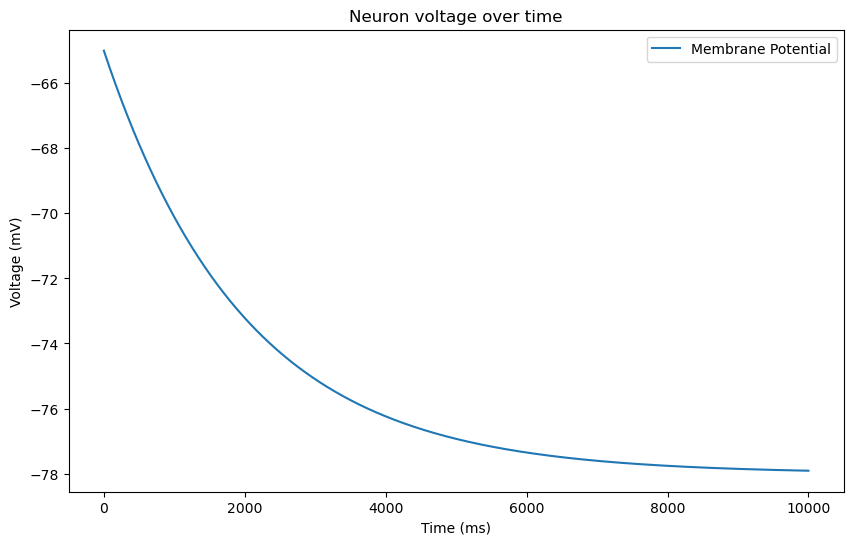

In [19]:
from Classes.currents.leaky import LeakyCurrent
from Classes.currents.sodium import SodiumCurrent
from Classes.currents.potassium import PotassiumCurrent
from Classes.simulation import Simulation
from Classes.neuronPatch import NeuronPatch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

# Simulation set-up
T = 100
dt = 0.01
simulation = Simulation(T=T, dt=dt)
loop = simulation.loop_num

# Create a neuron patch
neuron_dim = (10,)
patch = NeuronPatch(neuron_dim, -65, dt, loop)
patch.add_current(LeakyCurrent(e = -78, g = 0.05, dimensions=neuron_dim, loop=loop))
patch.add_current(SodiumCurrent(e = 50, g = 100, dimensions=neuron_dim, loop=loop, dt = dt, V_initial=-65))
patch.add_current(PotassiumCurrent(e = -90, g = 10, dimensions=neuron_dim, loop=loop, dt = dt, V_initial=-65))

# run simulation
simulation.add_patch(patch)
simulation.run()

# Data for plotting
data = patch.V

# one current 
one_neuron_data = data[0]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(one_neuron_data, label='Membrane Potential')
plt.title('Neuron voltage over time')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()